In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 接触者数8割減

$N$ 人の組織で接触者数を8割減させるのに必要な通勤者数 $M$ を求める。
接触者数の、通勤する人数による関数 $y(x)$ についてモデルを立てる。
安全サイドかどうかというのは結論で変わってくるので、ここでは以下の2種の呼称を使う(プロットに日本語が使えないので)。

* Pessimistic model: $y=x^2$ (max $N^2$)
* Optimistic model: $y=x$ (max $N$)

厳密には Pessimistic model は $y=x(x-1)/2$ であるが、どうせ後で2次関数に近似するので無視する。

接触者数を 20% まで削減するのに出勤者数をどこまで減らせばいいかは、それぞれ次のようになる。

* Pessimistic model: $M=\sqrt{0.2}N \approx 0.447N$
* Optimistic model: $M=0.2N$

この問題のミソは、モデルによって「現時点での接触数」の見積もりが変わることである。
現時点での接触数を多く見積もる Pessimistic model では8割減に必要な人数の削減はそこまでしなくてよくなる。
Optimistic model のほうが現時点での接触数が大幅に少ないので、それをさらに減らすために努力が必要になる。
真実はもちろん、2つのモデルの間にあると思われる(毎日すべての社員と濃厚接触するわけではない)が、後者のほうが安全サイドとなる。

まあ、8割減で実行再生産数が1を下回るというのも根拠が怪しいので、8割減が本当に必要かというと別の話になるが。

これはいろいろなことに逆説的な結論を導くトリックとして使えそうである。

## プロット

わかりにくいので10人の組織でプロットする。

In [79]:
x = np.arange(0,11)
y = x ** 2
y_r = 0.2 * y[-1]
x_r = y_r ** .5
y_or = x.max() * 0.2
x_or = x.max() * 0.2

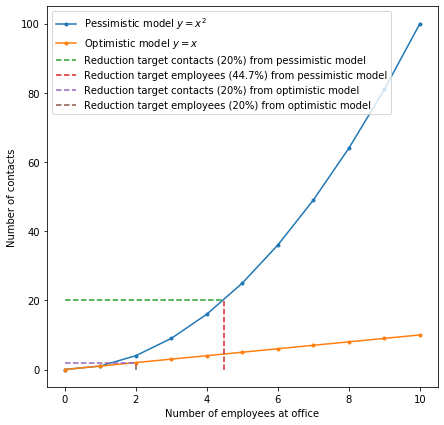

In [100]:
plt.subplots(figsize=(7,7))
plt.plot(x, y, '.-', label="Pessimistic model $y=x^2$")
plt.plot(x, x, '.-', label="Optimistic model $y=x$")
plt.plot([x.min(), x_r], [y_r, y_r], '--', label="Reduction target contacts (20%) from pessimistic model")
plt.plot([x_r, x_r], [y.min(), y_r], '--', label="Reduction target employees ({:3.03}%) from pessimistic model".format(100. * x_r / x.max()))
plt.plot([x.min(), x_or], [y_or, y_or], '--', label="Reduction target contacts (20%) from optimistic model")
plt.plot([x_or, x_or], [y.min(), y_or], '--', label="Reduction target employees (20%) from optimistic model")
plt.xlabel("Number of employees at office")
plt.ylabel("Number of contacts")
plt.legend()

## 最大接触数をそろえてプロット

最大接触数がモデルで異なるので見づらい。
y 軸のスケールを最大値をそろえてプロットする。

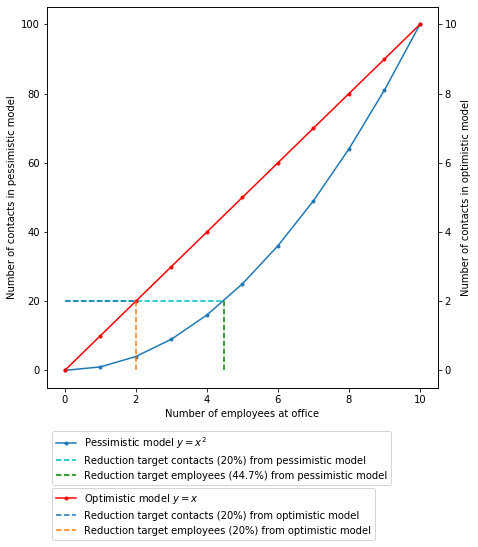

In [101]:
fig, ax = plt.subplots(figsize=(7,7))
ax2 = ax.twinx()
ax.plot(x, y, '.-', label="Pessimistic model $y=x^2$")
ax2.plot(x, x, 'r.-', label="Optimistic model $y=x$")
ax.plot([x.min(), x_r], [y_r, y_r], 'c--', label="Reduction target contacts (20%) from pessimistic model")
ax.plot([x_r, x_r], [y.min(), y_r], 'g--', label="Reduction target employees ({:3.03}%) from pessimistic model".format(100. * x_r / x.max()))
ax2.plot([x.min(), x_or], [y_or, y_or], '--', label="Reduction target contacts (20%) from optimistic model")
ax2.plot([x_or, x_or], [y.min(), y_or], '--', label="Reduction target employees (20%) from optimistic model")
ax.set_xlabel("Number of employees at office")
ax.set_ylabel("Number of contacts in pessimistic model")
ax2.set_ylabel("Number of contacts in optimistic model")
ax.legend(bbox_to_anchor=(0, -0.1), loc='upper left')
ax2.legend(bbox_to_anchor=(0, -0.25), loc='upper left')